Imports

In [14]:
import string
from nltk.corpus import stopwords
from stemming.porter2 import stem
from wordcloud import WordCloud
from IPython.display import display

Load & prepare words

In [15]:
with open("witcher.txt", encoding="UTF-8") as file:
    words = [word for line in file for word in line.split()]

# to lowercase
words = [word.lower() for word in words]
# remove stop words
stop_words = stopwords.words("english")
words = [word for word in words if word not in stop_words]
# remove punctuation
words = [word.translate(str.maketrans("", "", string.punctuation)) for word in words]
# remove single letters (created after removing punctuation)
words = [word for word in words if len(word) > 1]
# stemming
# words = [stem(word) for word in words]

Create word pairs

In [16]:
count_dict = {}
for word in words:
    if word in count_dict:
        count_dict[word] += 1
    else:
        count_dict[word] = 1
pairs = [(key, value) for (key, value) in count_dict.items()]
occurrences = lambda pair: pair[1]
pairs.sort(key=occurrences, reverse=True)

Word Cloud

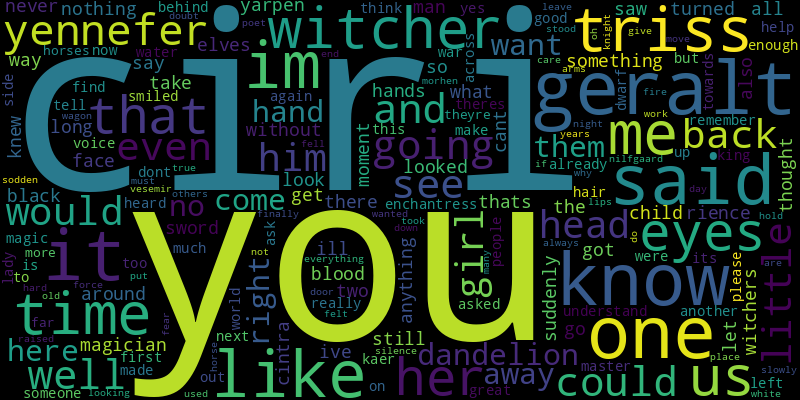

In [17]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(pairs))
wordcloud.to_file("img/cloud.png")
display(wordcloud.to_image())